In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


In [9]:
## The script here automatically detects the project root by 
# searching upward from the current working directory until 
# it finds a folder containing "data/". 
# ensures that the project remains fully reproducible 
# even when executed from different environments :)

from pathlib import Path

CURRENT_PATH = Path(__file__).resolve() if "__file__" in globals() else Path().resolve()

PROJECT_ROOT = None
for parent in [CURRENT_PATH] + list(CURRENT_PATH.parents):
    if (parent / "data").exists():
        PROJECT_ROOT = parent
        break

if PROJECT_ROOT is None:
    raise FileNotFoundError("Project root not found — expected a directory containing 'data/'.")

print(f"Project root detected as: {PROJECT_ROOT}")

DATA_DIR = PROJECT_ROOT / "data"      
FIG_DIR = PROJECT_ROOT / "figures"     
SCRIPT_DIR = PROJECT_ROOT / "scripts"  

FIG_DIR.mkdir(exist_ok=True) ##create if not exists

Project root detected as: /Users/anniee_me/qtm350-final-project


In [10]:
df = pd.read_csv(DATA_DIR / "wdi_edu_filtered.csv")


In [11]:

df["Country"] = df["Country"].astype(str).str.strip()

gender_df = df[df["series"].str.contains("_male|_female", case=False, na=False)].copy()

year_cols = [c for c in gender_df.columns if c.startswith("YR")]
long_df = gender_df.melt(
    id_vars=["Country", "series"],
    value_vars=year_cols,
    var_name="Year",
    value_name="Rate"
)

long_df["Year"] = long_df["Year"].str.replace("YR", "", regex=False).astype(int)
long_df[["Level", "Gender"]] = long_df["series"].str.split(pat="_", n=1, expand=True)

pivot_df = long_df.pivot_table(
    index=["Country", "Level", "Year"],
    columns="Gender",
    values="Rate"
).reset_index()

pivot_df["GPI"] = pivot_df["female"] / pivot_df["male"]
pivot_df = pivot_df.replace([np.inf, -np.inf], np.nan).dropna(subset=["GPI"])

pivot_df["Country"] = pivot_df["Country"].astype(str).str.strip()

regions = [
    "East Asia & Pacific",
    "Latin America & Caribbean",
    "Middle East, North Africa, Afghanistan & Pakistan",
    "South Asia",
    "Sub-Saharan Africa",
    "World"
]

plot_df = pivot_df[pivot_df["Country"].isin(regions)].copy()

region_colors = {
    "East Asia & Pacific": "#0072B2",
    "Latin America & Caribbean": "#E69F00",
    "Middle East, North Africa, Afghanistan & Pakistan": "#009E73",
    "South Asia": "#D55E00",
    "Sub-Saharan Africa": "#6F42C1",
    "World": "#58595B"
}

#### Primary Education Plot

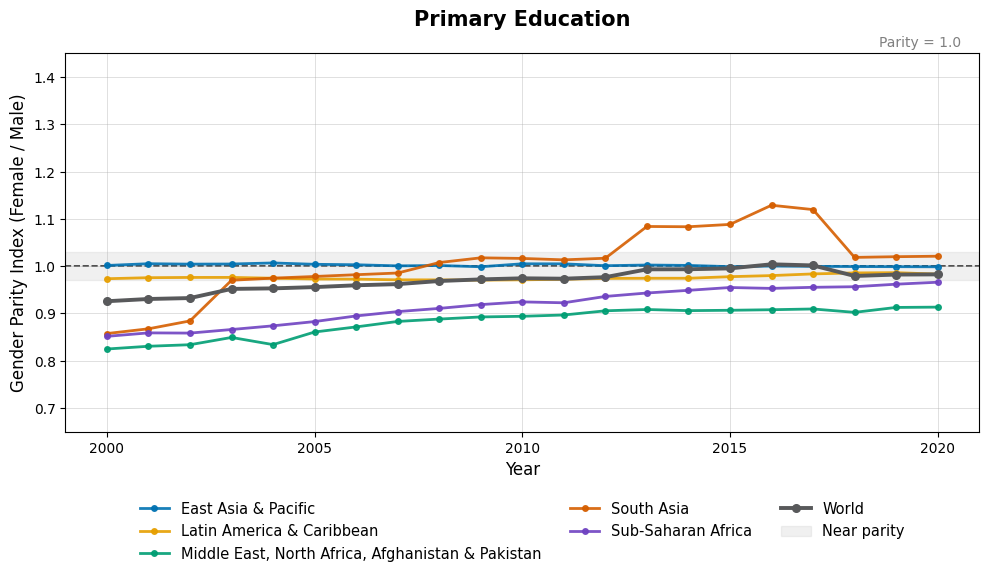

In [12]:
level = "primary"
fig, ax = plt.subplots(figsize=(10, 6))
subset = plot_df[plot_df["Level"] == level]

for region in regions:
    data = subset[subset["Country"] == region].sort_values("Year")
    if data.empty: 
        continue
    color = region_colors.get(region, "gray")
    lw   = 2.8 if region == "World" else 2.0
    alpha = 1.0 if region == "World" else 0.9
    z    = 10  if region == "World" else 5
    ms   = 5.5 if region == "World" else 4
    
    ax.plot(data["Year"], data["GPI"], 
            marker="o", markersize=ms, linewidth=lw, 
            color=color, alpha=alpha, label=region, zorder=z)

ax.axhspan(0.97, 1.03, color="#CFCFCF", alpha=0.3, zorder=1, label="Near parity")
ax.axhline(1.0, color="#333333", linestyle="--", linewidth=1.2, zorder=1)

ax.set_title("Primary Education", fontsize=15, fontweight="bold", pad=20)
ax.set_ylabel("Gender Parity Index (Female / Male)", fontsize=12)
ax.set_xlabel("Year", fontsize=12)
ax.set_ylim(0.65, 1.45)

years = sorted(subset["Year"].unique())
ax.set_xticks(np.arange(min(years), max(years)+1, 5))

ax.grid(True, linewidth=0.4, alpha=0.7)
ax.text(0.98, 1.01, "Parity = 1.0", transform=ax.transAxes, 
        fontsize=10, ha="right", va="bottom", color="gray")

legend = ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), 
                   ncol=3, frameon=False, fontsize=10.5)
legend.get_title().set_fontweight("bold")

plt.tight_layout()
plt.savefig(FIG_DIR / "gpi_primary.png",
            dpi=300, bbox_inches="tight")
plt.show(  )

#### Secondary Education Plot

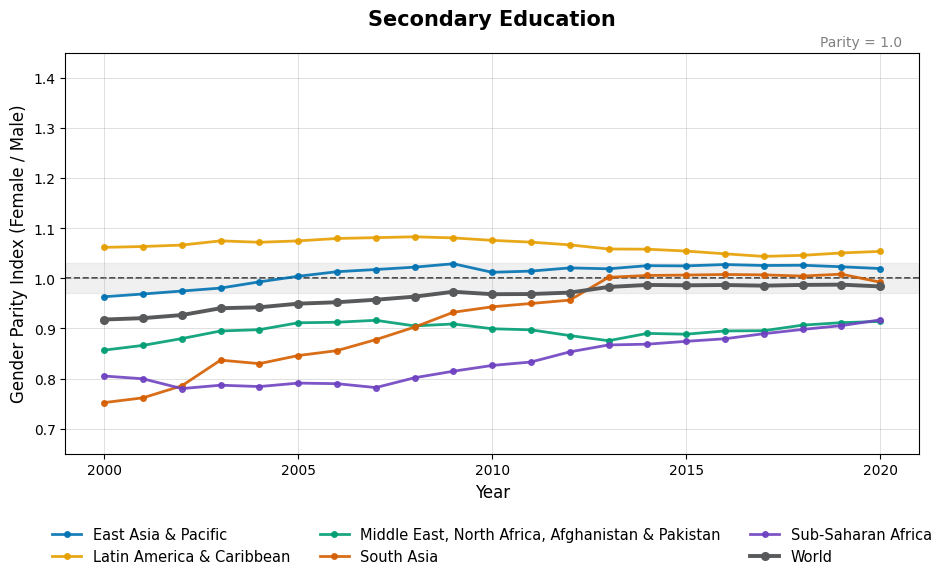

In [13]:
level = "secondary"
fig, ax = plt.subplots(figsize=(10, 6))
subset = plot_df[plot_df["Level"] == level]

for region in regions:
    data = subset[subset["Country"] == region].sort_values("Year")
    if data.empty: continue
    color = region_colors.get(region, "gray")
    lw   = 2.8 if region == "World" else 2.0
    alpha = 1.0 if region == "World" else 0.9
    z    = 10  if region == "World" else 5
    ms   = 5.5 if region == "World" else 4
    
    ax.plot(data["Year"], data["GPI"], marker="o", markersize=ms, 
            linewidth=lw, color=color, alpha=alpha, label=region, zorder=z)

ax.axhspan(0.97, 1.03, color="#CFCFCF", alpha=0.3, zorder=1)
ax.axhline(1.0, color="#333333", linestyle="--", linewidth=1.2, zorder=1)

ax.set_title("Secondary Education", fontsize=15, fontweight="bold", pad=20)
ax.set_ylabel("Gender Parity Index (Female / Male)", fontsize=12)
ax.set_xlabel("Year", fontsize=12)
ax.set_ylim(0.65, 1.45)

years = sorted(subset["Year"].unique())
ax.set_xticks(np.arange(min(years), max(years)+1, 5))

ax.grid(True, linewidth=0.4, alpha=0.7)
ax.text(0.98, 1.01, "Parity = 1.0", transform=ax.transAxes, 
        fontsize=10, ha="right", va="bottom", color="gray")

legend = ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), 
                   ncol=3, frameon=False, fontsize=10.5)
legend.get_title().set_fontweight("bold")

plt.tight_layout()
plt.savefig(FIG_DIR / "gpi_secondary.png",
            dpi=300, bbox_inches="tight")
plt.show()

#### Tertiary Education Plot

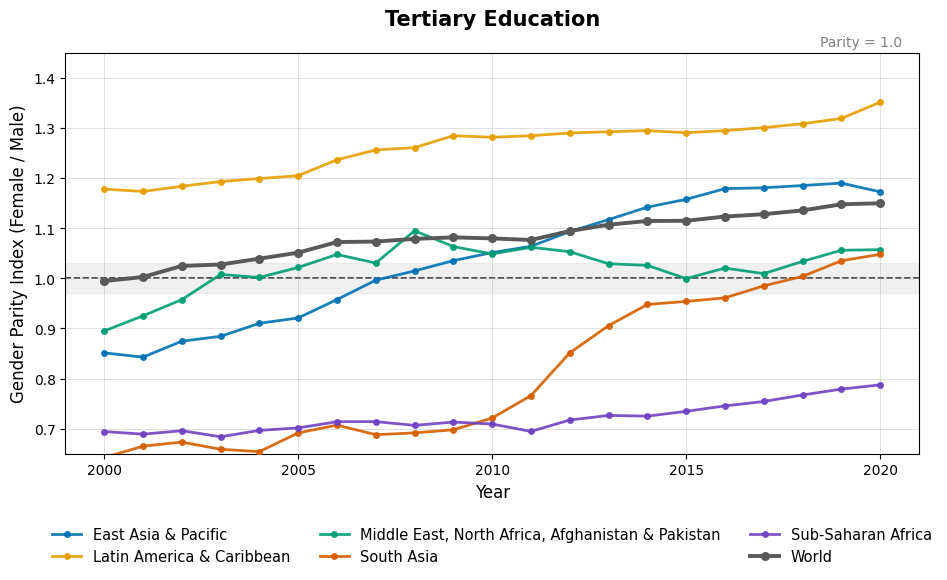

In [14]:
level = "tertiary"
fig, ax = plt.subplots(figsize=(10, 6))
subset = plot_df[plot_df["Level"] == level]

for region in regions:
    data = subset[subset["Country"] == region].sort_values("Year")
    if data.empty: continue
    color = region_colors.get(region, "gray")
    lw   = 2.8 if region == "World" else 2.0
    alpha = 1.0 if region == "World" else 0.9
    z    = 10  if region == "World" else 5
    ms   = 5.5 if region == "World" else 4
    
    ax.plot(data["Year"], data["GPI"], marker="o", markersize=ms, 
            linewidth=lw, color=color, alpha=alpha, label=region, zorder=z)

ax.axhspan(0.97, 1.03, color="#CFCFCF", alpha=0.3, zorder=1)
ax.axhline(1.0, color="#333333", linestyle="--", linewidth=1.2, zorder=1)

ax.set_title("Tertiary Education", fontsize=15, fontweight="bold", pad=20)
ax.set_ylabel("Gender Parity Index (Female / Male)", fontsize=12)
ax.set_xlabel("Year", fontsize=12)
ax.set_ylim(0.65, 1.45)

years = sorted(subset["Year"].unique())
ax.set_xticks(np.arange(min(years), max(years)+1, 5))

ax.grid(True, linewidth=0.4, alpha=0.7)
ax.text(0.98, 1.01, "Parity = 1.0", transform=ax.transAxes, 
        fontsize=10, ha="right", va="bottom", color="gray")

legend = ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), 
                   ncol=3, frameon=False, fontsize=10.5)
legend.get_title().set_fontweight("bold")

plt.tight_layout()
plt.savefig(FIG_DIR / "gpi_tertiary.png", dpi=300, bbox_inches="tight")
plt.show()